Import dependencies

In [1]:
# type: ignore
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

## import data
data = pd.read_csv('../../data/processed/forecast.csv')

## preprocess
# date as datetime
data=data[["date","capacity"]]
data.columns = ['ds','y']
data['ds'] = pd.to_datetime(data['ds'])
# data.plot(x='ds',y='y',figsize=(18,6))

# split train vs test
test = data.iloc[len(data)-50:] # last 50
train = data.iloc[:len(data)-50] # remaining
print(train.head())

Importing plotly failed. Interactive plots will not work.


          ds   y
0 2022-01-01   1
1 2022-01-02   4
2 2022-01-03   9
3 2022-01-04  16
4 2022-01-05  25


In [2]:
# call prophet
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=50) #MS for monthly, H for hourly
forecast = m.predict(future)

21:08:40 - cmdstanpy - INFO - Chain [1] start processing
21:08:40 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
360,2022-12-27,124481.337364,122549.065661,126497.286105
361,2022-12-28,125049.058885,123038.097865,127119.944542
362,2022-12-29,125617.255335,123544.931972,127793.565634
363,2022-12-30,126185.610014,124070.033578,128362.712544
364,2022-12-31,126736.250164,124572.016424,129057.468172


In [6]:
test.tail()

,ds,y
360,2022-12-27,130321
361,2022-12-28,131044
362,2022-12-29,131769
363,2022-12-30,132496
364,2022-12-31,133225


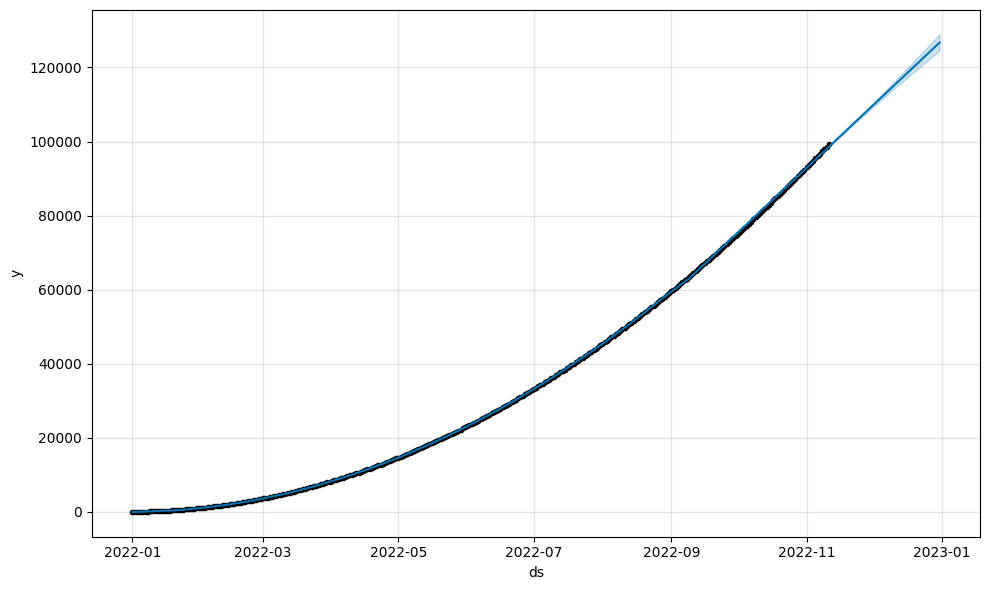

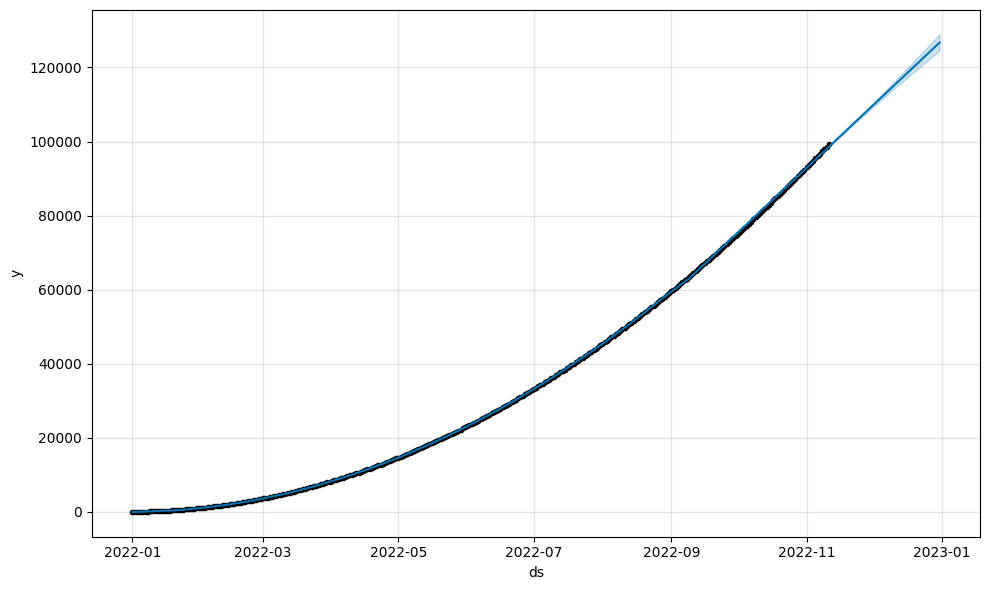

In [8]:
m.plot(forecast)

21:06:19 - cmdstanpy - INFO - Chain [1] start processing
21:06:19 - cmdstanpy - INFO - Chain [1] done processing


          ds          y
0 2014-11-01  16.928571
1 2014-11-02  16.800000
2 2014-11-04  17.000000
3 2014-11-05  17.000000
4 2014-11-06  17.000000


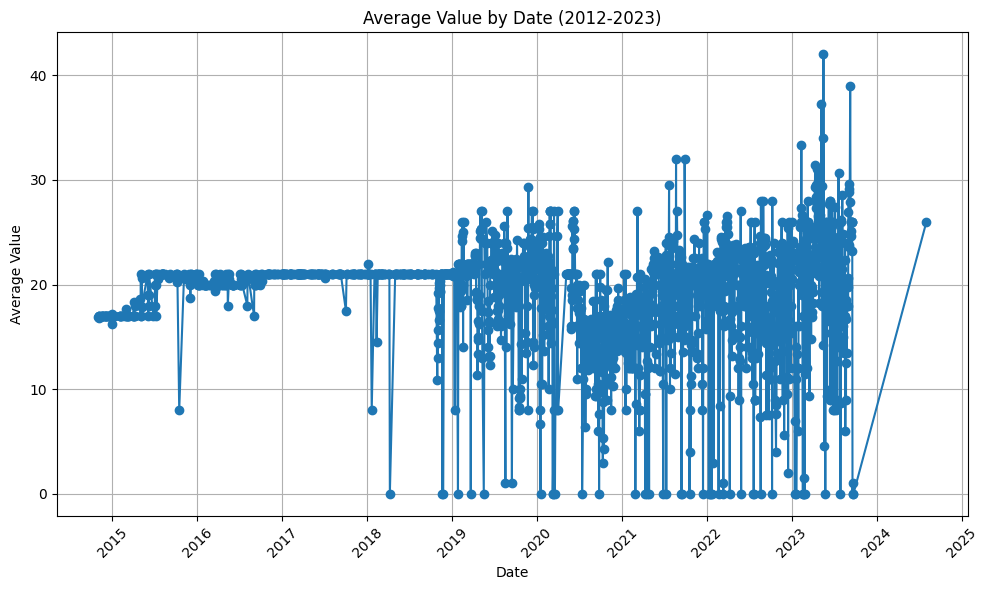

In [7]:
# type: ignore
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
import matplotlib.pyplot as plt

## import data
data = pd.read_csv('../../data/interim/capacity-location4-programfullbody.csv')

## preprocess
# date as datetime
data=data[["date","demand"]]
data.columns = ['ds','y']
data['ds'] = pd.to_datetime(data['ds'])

# split train vs test
test = data.iloc[len(data)-50:] # last 50
train = data.iloc[:len(data)-50] # remaining
print(train.head())

# call prophet
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=200) #MS for monthly, H for hourly
forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# m.plot(forecast)

# Plot the data

start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2023-12-31')
result = data[(data['ds'] >= start_date) & (data['ds'] <= end_date)]

plt.figure(figsize=(10, 6))
plt.plot(data['ds'], data['y'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Average Value')
plt.title('Average Value by Date (2012-2023)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()